In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

ghi_csv = 'https://gist.githubusercontent.com/rafmirh/73f3c28b54e8f478e10b873f2c1908cc/raw/4378163ad98e2931fa3114a82c6d76469e310bed/ghi_cu.csv'
df_ghi_csv = pd.read_csv(ghi_csv)
df = df_ghi_csv.drop(columns=['Directa W/m2', 'Difusa W/m2', 'Inclinada W/m2'], axis=1)
df.head()

ghi = df[['Global W/m2']].values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(ghi) 

window_size = 52

def create_sequences(data, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i+window_size])
        labels.append(data[i + window_size, 0])
    return np.array(sequences), np.array(labels)

X, y = create_sequences(scaled_data, window_size)

split = int(len(X) * 0.80)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=200, return_sequences=True, input_shape=(window_size, X_train.shape[2])))
model.add(LSTM(units=52, return_sequences=False))
model.add(Dense(units=26, activation='tanh'))
model.add(Dense(units=13, activation='tanh'))
model.add(Dense(units=1))

from tensorflow.keras.optimizers import Adam

learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

# Compilar el modelo
model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, batch_size=1, epochs=150)

# Hacer predicciones
predictions = model.predict(X_test)

# Desescalar los datos predichos
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], 3))), axis=1))[:,0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 3))), axis=1))[:,0]

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, predictions)
mse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"MAE: {mae}")
print(f"MSE: {mse}")

# Crear una secuencia inicial para predecir las semanas de 2019
input_sequence = scaled_data[-window_size:].reshape(1, window_size, 1)

# Lista para almacenar las predicciones desescaladas
predictions_2019 = []

# Iterar para predecir 52 semanas
for _ in range(52):
    # Hacer la predicción
    predicted_value = model.predict(input_sequence)[0, 0]
    predictions_2019.append(predicted_value)
    
    # Actualizar la secuencia de entrada
    input_sequence = np.append(input_sequence[:, 1:, :], [[[predicted_value]]], axis=1)

# Desescalar las predicciones
predictions_2019_descaled = scaler.inverse_transform(
    np.concatenate((np.array(predictions_2019).reshape(-1, 1), np.zeros((52, 3))), axis=1)
)[:, 0]

# Crear el dataframe para 2019
semanas_2019 = list(range(1, 53))
año_2019 = [2019] * 52

df_2019 = pd.DataFrame({
    'Año': año_2019,
    'Semanas': semanas_2019,
    'Global W/m2': predictions_2019_descaled
})

# Concatenar al dataframe original
df = pd.concat([df, df_2019], ignore_index=True)

# Mostrar el resultado
print(df.tail(60))  # Mostrar las últimas 60 filas para verificar

ghi = df[['Global W/m2']].values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(ghi)

window_size = 104

def create_sequences(data, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i+window_size])
        # El precio es la primera columna
        labels.append(data[i + window_size, 0])
    return np.array(sequences), np.array(labels)

X, y = create_sequences(scaled_data, window_size)

split = int(len(X) * 0.80)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=200, return_sequences=True, input_shape=(window_size, X_train.shape[2])))
model.add(LSTM(units=52, return_sequences=False))
model.add(Dense(units=26, activation='tanh'))
model.add(Dense(units=13, activation='tanh'))
model.add(Dense(units=1))

from tensorflow.keras.optimizers import Adam

learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

# Compilar el modelo
model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, batch_size=1, epochs=150)

# Hacer predicciones
predictions = model.predict(X_test)

# Desescalar los datos predichos
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], 3))), axis=1))[:,0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 3))), axis=1))[:,0]

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_2020 = mean_absolute_error(y_test, predictions)
mse_2020 = np.sqrt(mean_squared_error(y_test, predictions))

print(f"MAE_2020: {mae_2020}")
print(f"MSE_2020: {mse_2020}")

# Crear una secuencia inicial para predecir las semanas de 2020
input_sequence = scaled_data[-window_size:].reshape(1, window_size, 1)

# Lista para almacenar las predicciones desescaladas
predictions_2020 = []

# Iterar para predecir 52 semanas
for _ in range(52):
    # Hacer la predicción
    predicted_value = model.predict(input_sequence)[0, 0]
    predictions_2020.append(predicted_value)
    
    # Actualizar la secuencia de entrada
    input_sequence = np.append(input_sequence[:, 1:, :], [[[predicted_value]]], axis=1)

# Desescalar las predicciones
predictions_2020_descaled = scaler.inverse_transform(
    np.concatenate((np.array(predictions_2020).reshape(-1, 1), np.zeros((52, 3))), axis=1)
)[:, 0]

# Crear el dataframe para 2020
semanas_2020 = list(range(1, 53))
año_2020 = [2020] * 52

df_2020 = pd.DataFrame({
    'Año': año_2020,
    'Semanas': semanas_2020,
    'Global W/m2': predictions_2020_descaled
})

# Concatenar al dataframe original
df = pd.concat([df, df_2020], ignore_index=True)

# Mostrar el resultado
print(df.tail(60))  # Mostrar las últimas 60 filas para verificar

ghi = df[['Global W/m2']].values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(ghi)

window_size = 156

def create_sequences(data, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i+window_size])
        # El precio es la primera columna
        labels.append(data[i + window_size, 0])
    return np.array(sequences), np.array(labels)

X, y = create_sequences(scaled_data, window_size)

split = int(len(X) * 0.80)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=200, return_sequences=True, input_shape=(window_size, X_train.shape[2])))
model.add(LSTM(units=52, return_sequences=False))
model.add(Dense(units=26, activation='tanh'))
model.add(Dense(units=13, activation='tanh'))
model.add(Dense(units=1))

from tensorflow.keras.optimizers import Adam

learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

# Compilar el modelo
model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, batch_size=1, epochs=150)

# Hacer predicciones
predictions = model.predict(X_test)

# Desescalar los datos predichos
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], 3))), axis=1))[:,0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 3))), axis=1))[:,0]

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_2021 = mean_absolute_error(y_test, predictions)
mse_2021 = np.sqrt(mean_squared_error(y_test, predictions))

print(f"MAE_2021: {mae_2021}")
print(f"MSE_2021: {mse_2021}")

# Crear una secuencia inicial para predecir las semanas de 2021
input_sequence = scaled_data[-window_size:].reshape(1, window_size, 1)

# Lista para almacenar las predicciones desescaladas
predictions_2021 = []

# Iterar para predecir 52 semanas
for _ in range(52):
    # Hacer la predicción
    predicted_value = model.predict(input_sequence)[0, 0]
    predictions_2021.append(predicted_value)
    
    # Actualizar la secuencia de entrada
    input_sequence = np.append(input_sequence[:, 1:, :], [[[predicted_value]]], axis=1)

# Desescalar las predicciones
predictions_2021_descaled = scaler.inverse_transform(
    np.concatenate((np.array(predictions_2021).reshape(-1, 1), np.zeros((52, 3))), axis=1)
)[:, 0]

# Crear el dataframe para 2021
semanas_2021 = list(range(1, 53))
año_2021 = [2021] * 52

df_2021 = pd.DataFrame({
    'Año': año_2021,
    'Semanas': semanas_2021,
    'Global W/m2': predictions_2021_descaled
})

# Concatenar al dataframe original
df = pd.concat([df, df_2021], ignore_index=True)

# Mostrar el resultado
print(df.tail(60))  # Mostrar las últimas 60 filas para verificar

ghi = df[['Global W/m2']].values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(ghi)

window_size = 208

def create_sequences(data, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i+window_size])
        # El precio es la primera columna
        labels.append(data[i + window_size, 0])
    return np.array(sequences), np.array(labels)

X, y = create_sequences(scaled_data, window_size)

split = int(len(X) * 0.80)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=200, return_sequences=True, input_shape=(window_size, X_train.shape[2])))
model.add(LSTM(units=52, return_sequences=False))
model.add(Dense(units=26, activation='tanh'))
model.add(Dense(units=13, activation='tanh'))
model.add(Dense(units=1))

from tensorflow.keras.optimizers import Adam

learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

# Compilar el modelo
model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, batch_size=1, epochs=150)

# Hacer predicciones
predictions = model.predict(X_test)

# Desescalar los datos predichos
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], 3))), axis=1))[:,0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 3))), axis=1))[:,0]

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_2022 = mean_absolute_error(y_test, predictions)
mse_2022 = np.sqrt(mean_squared_error(y_test, predictions))

print(f"MAE_2022: {mae_2022}")
print(f"MSE_2022: {mse_2022}")

# Crear una secuencia inicial para predecir las semanas de 2022
input_sequence = scaled_data[-window_size:].reshape(1, window_size, 1)

# Lista para almacenar las predicciones desescaladas
predictions_2022 = []

# Iterar para predecir 52 semanas
for _ in range(52):
    # Hacer la predicción
    predicted_value = model.predict(input_sequence)[0, 0]
    predictions_2022.append(predicted_value)
    
    # Actualizar la secuencia de entrada
    input_sequence = np.append(input_sequence[:, 1:, :], [[[predicted_value]]], axis=1)

# Desescalar las predicciones
predictions_2022_descaled = scaler.inverse_transform(
    np.concatenate((np.array(predictions_2022).reshape(-1, 1), np.zeros((52, 3))), axis=1)
)[:, 0]

# Crear el dataframe para 2022
semanas_2022 = list(range(1, 53))
año_2022 = [2022] * 52

df_2022 = pd.DataFrame({
    'Año': año_2022,
    'Semanas': semanas_2022,
    'Global W/m2': predictions_2022_descaled
})

# Concatenar al dataframe original
df = pd.concat([df, df_2022], ignore_index=True)

# Mostrar el resultado
print(df.tail(60))  # Mostrar las últimas 60 filas para verificar

ghi = df[['Global W/m2']].values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(ghi)

window_size = 260

def create_sequences(data, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i+window_size])
        # El precio es la primera columna
        labels.append(data[i + window_size, 0])
    return np.array(sequences), np.array(labels)

X, y = create_sequences(scaled_data, window_size)

split = int(len(X) * 0.80)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=200, return_sequences=True, input_shape=(window_size, X_train.shape[2])))
model.add(LSTM(units=52, return_sequences=False))
model.add(Dense(units=26, activation='tanh'))
model.add(Dense(units=13, activation='tanh'))
model.add(Dense(units=1))

from tensorflow.keras.optimizers import Adam

learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

# Compilar el modelo
model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, batch_size=1, epochs=150)

# Hacer predicciones
predictions = model.predict(X_test)

# Desescalar los datos predichos
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], 3))), axis=1))[:,0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 3))), axis=1))[:,0]

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_2023 = mean_absolute_error(y_test, predictions)
mse_2023 = np.sqrt(mean_squared_error(y_test, predictions))

print(f"MAE_2023: {mae_2023}")
print(f"MSE_2023: {mse_2023}")

# Crear una secuencia inicial para predecir las semanas de 2023
input_sequence = scaled_data[-window_size:].reshape(1, window_size, 1)

# Lista para almacenar las predicciones desescaladas
predictions_2023 = []

# Iterar para predecir 52 semanas
for _ in range(52):
    # Hacer la predicción
    predicted_value = model.predict(input_sequence)[0, 0]
    predictions_2023.append(predicted_value)
    
    # Actualizar la secuencia de entrada
    input_sequence = np.append(input_sequence[:, 1:, :], [[[predicted_value]]], axis=1)

# Desescalar las predicciones
predictions_2023_descaled = scaler.inverse_transform(
    np.concatenate((np.array(predictions_2023).reshape(-1, 1), np.zeros((52, 3))), axis=1)
)[:, 0]

# Crear el dataframe para 2023
semanas_2023 = list(range(1, 53))
año_2023 = [2023] * 52

df_2023 = pd.DataFrame({
    'Año': año_2023,
    'Semanas': semanas_2023,
    'Global W/m2': predictions_2023_descaled
})

# Concatenar al dataframe original
df = pd.concat([df, df_2023], ignore_index=True)

# Mostrar el resultado
print(df.tail(60))  # Mostrar las últimas 60 filas para verificar

ghi = df[['Global W/m2']].values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(ghi)

window_size = 312

def create_sequences(data, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i+window_size])
        # El precio es la primera columna
        labels.append(data[i + window_size, 0])
    return np.array(sequences), np.array(labels)

X, y = create_sequences(scaled_data, window_size)

split = int(len(X) * 0.80)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=200, return_sequences=True, input_shape=(window_size, X_train.shape[2])))
model.add(LSTM(units=52, return_sequences=False))
model.add(Dense(units=26, activation='tanh'))
model.add(Dense(units=13, activation='tanh'))
model.add(Dense(units=1))

from tensorflow.keras.optimizers import Adam

learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

# Compilar el modelo
model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, batch_size=1, epochs=150)

# Hacer predicciones
predictions = model.predict(X_test)

# Desescalar los datos predichos
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], 3))), axis=1))[:,0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 3))), axis=1))[:,0]

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_2024 = mean_absolute_error(y_test, predictions)
mse_2024 = np.sqrt(mean_squared_error(y_test, predictions))

print(f"MAE_2024: {mae_2024}")
print(f"MSE_2024: {mse_2024}")

# Crear una secuencia inicial para predecir las semanas de 2024
input_sequence = scaled_data[-window_size:].reshape(1, window_size, 1)

# Lista para almacenar las predicciones desescaladas
predictions_2024 = []

# Iterar para predecir 52 semanas
for _ in range(52):
    # Hacer la predicción
    predicted_value = model.predict(input_sequence)[0, 0]
    predictions_2024.append(predicted_value)
    
    # Actualizar la secuencia de entrada
    input_sequence = np.append(input_sequence[:, 1:, :], [[[predicted_value]]], axis=1)

# Desescalar las predicciones
predictions_2024_descaled = scaler.inverse_transform(
    np.concatenate((np.array(predictions_2024).reshape(-1, 1), np.zeros((52, 3))), axis=1)
)[:, 0]

# Crear el dataframe para 2024
semanas_2024 = list(range(1, 53))
año_2024 = [2024] * 52

df_2024 = pd.DataFrame({
    'Año': año_2024,
    'Semanas': semanas_2024,
    'Global W/m2': predictions_2024_descaled
})

# Concatenar al dataframe original
df = pd.concat([df, df_2024], ignore_index=True)

# Mostrar el resultado
print(df.tail(60))  # Mostrar las últimas 60 filas para verificar


Epoch 1/150


c:\Users\gfdc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1012
Epoch 2/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0464
Epoch 3/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0431
Epoch 4/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0474
Epoch 5/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0333
Epoch 6/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0446
Epoch 7/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0325
Epoch 8/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0366
Epoch 9/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0237
Epoch 10/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0528
Epoch 11/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0337
Epoch 12/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0348
Epoch 13/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0386
Epoch 14/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0332
Epoch 15/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0237
Epoch 16/

c:\Users\gfdc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0675
Epoch 2/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0329
Epoch 3/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0428
Epoch 4/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0329
Epoch 5/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0398
Epoch 6/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0349
Epoch 7/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0267
Epoch 8/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0323
Epoch 9/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0283
Epoch 10/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0354
Epoch 11/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0357
Epoch 12/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0285
Epoch 13/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0288
Epoch 14/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0322
Epoch 15/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0281
E

c:\Users\gfdc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0908
Epoch 2/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0476
Epoch 3/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0215
Epoch 4/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0347
Epoch 5/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0265
Epoch 6/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0235
Epoch 7/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0221
Epoch 8/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0257
Epoch 9/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0330
Epoch 10/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0332
Epoch 11/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0243
Epoch 12/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0208
Epoch 13/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0244
Epoch 14/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0192
Epoch 15/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0176
E

c:\Users\gfdc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0969
Epoch 2/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0217
Epoch 3/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0226
Epoch 4/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0383
Epoch 5/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0248
Epoch 6/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0250
Epoch 7/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0323
Epoch 8/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0220
Epoch 9/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0301
Epoch 10/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0242
Epoch 11/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0297
Epoch 12/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0121
Epoch 13/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0165
Epoch 14/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0137
Epoch 15/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0165
E

c:\Users\gfdc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - loss: 0.0602
Epoch 2/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0185
Epoch 3/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0210
Epoch 4/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0179
Epoch 5/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0232
Epoch 6/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0182
Epoch 7/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 0.0148
Epoch 8/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0147
Epoch 9/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0152
Epoch 10/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 0.0161
Epoch 11/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 0.0154
Epoch 12/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0163
Epoch 13/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 0.0129
Epoch 14/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 0.0094
Epoch 15/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0128
E

c:\Users\gfdc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - loss: 0.0332
Epoch 2/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0185
Epoch 3/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0169
Epoch 4/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0211
Epoch 5/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - loss: 0.0121
Epoch 6/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 33s 391ms/step - loss: 0.0124
Epoch 7/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 36s 429ms/step - loss: 0.0108
Epoch 8/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 38s 382ms/step - loss: 0.0160
Epoch 9/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 38s 451ms/step - loss: 0.0120
Epoch 10/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 37s 440ms/step - loss: 0.0141
Epoch 11/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 36s 427ms/step - loss: 0.0100
Epoch 12/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 35s 418ms/step - loss: 0.0067
Epoch 13/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 35s 418ms/step - loss: 0.0065
Epoch 14/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 37s 442ms/step - loss: 0.0053
Epoch 15/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 36s 431ms/s

In [3]:
print(f"MAE_2019: {mae: 2f}")
print(f"MSE_2019: {mse: 2f}\n")

print(f"MAE_2020: {mae_2020: 2f}")
print(f"MSE_2020: {mse_2020: 2f}\n")

print(f"MAE_2021: {mae_2021: 2f}")
print(f"MSE_2021: {mse_2021: 2f}\n")

print(f"MAE_2022: {mae_2022: 2f}")
print(f"MSE_2022: {mse_2022: 2f}\n")

print(f"MAE_2023: {mae_2023: 2f}")
print(f"MSE_2023: {mse_2023: 2f}\n")

print(f"MAE_2024: {mae_2024: 2f}")
print(f"MSE_2024: {mse_2024: 2f}")

MAE_2019:  58.982447
MSE_2019:  75.270906

MAE_2020:  50.304145
MSE_2020:  62.595238

MAE_2021:  28.571472
MSE_2021:  37.711854

MAE_2022:  26.100386
MSE_2022:  34.264590

MAE_2023:  13.650723
MSE_2023:  17.123221

MAE_2024:  14.928963
MSE_2024:  18.656331


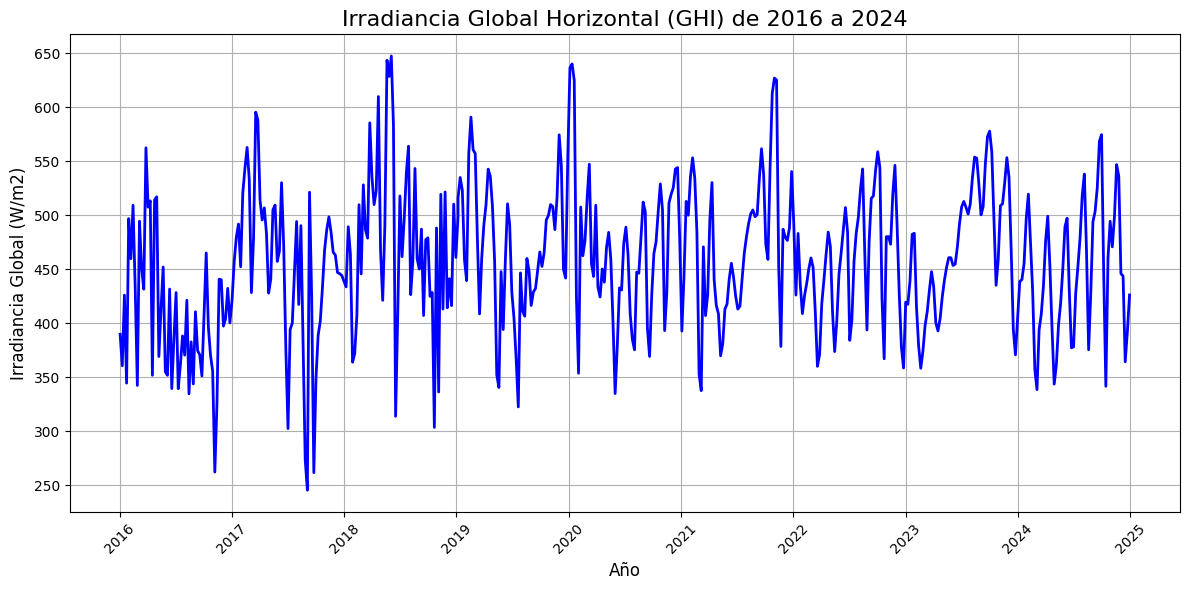

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'df' is the final DataFrame that contains the data for years 2016-2024.
# Ensure that the 'Año' and 'Semanas' columns are combined into a single date column

# Create a 'Date' column combining 'Año' and 'Semanas'
df['Date'] = pd.to_datetime(df['Año'].astype(str) + df['Semanas'].astype(str) + '0', format='%Y%U%w')

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Global W/m2'], label='Global Irradiance (GHI)', color='b', linewidth=2)
plt.title('Irradiancia Global Horizontal (GHI) de 2016 a 2024', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Irradiancia Global (W/m2)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

